# Text Mining Problem 1

Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - check data info and null values.
    - tranform to required form
2. Preprocessing Data
    - remove all unnecessary symbols and items from tweets
    - do not remove stopwords as tweets have less words
3. Tweet Sentiment Values
    - use vader_lexicon
    - apply sentiment intensity analyzer function to dataset
    - add sentiment class and polarity scores to dataset
    - make visualisations
4. WordCloud
    - use word cloud library and generate a word cloud for visualisations
5. Elon-Mask
    - Make a masking wordcloud plot for elon musk
6. Conclusion


## Import New Dataset

In [1]:
! pip install wordcloud

In [2]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv("C:/Users/Admin/Documents/Assignments/11_Text Mining/11Q1/Elon_musk.csv",encoding='cp1252').drop('Unnamed: 0',axis=1)
df = raw_data.copy()
df #There are 1999 tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.info() #There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [5]:
df.Text = df.Text.astype(str)

## Preprocessing data

We cannot remove stopwords because tweets mostly contain small words.

In [6]:
# Clean The Data using RegEx
#result = re.sub(pattern, repl, string, count=0, flags=0)

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"_[A-Za-z0-9]", "", text)#Removing underscores

    
    return text
# Clean The Text
df["Text"] = df["Text"].apply(cleantext)
df.head()

,Text
0,I’m an alien
1,Aarmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [7]:
df.tail() # We have removed most of the unnecessary stuff from our tweets dataset

,Text
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998,Progress update August 28


## Tweet Sentiment Values

In [8]:
#nltk.download('vader_lexicon')

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentialz = SentimentIntensityAnalyzer()

In [10]:
sentialz.polarity_scores(df.Text.iloc[2])


{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [11]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sentialz.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'
    
def get_sentiment(review):
    return pd.Series([sentialz.polarity_scores(review),get_senti_class(review)])

In [12]:
#Applying function to all tweets
df[["Scores", "Sentiment"]] = df.Text.apply(get_sentiment)
df

,Text,Scores,Sentiment
0,I’m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Aarmack Ray tracing on Cyberpunk with HDR is n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",positive
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
4,Congratulations Tesla China for amazing execu...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",positive
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative
1995,Make sure to read ur terms &amp; conditions b...,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",positive
1996,Samwise Gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...",negative


In [13]:
comp_values = [d.get('compound') for d in df.Scores]

In [14]:
df.Sentiment.value_counts()

neutral     888
positive    880
negative    231
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

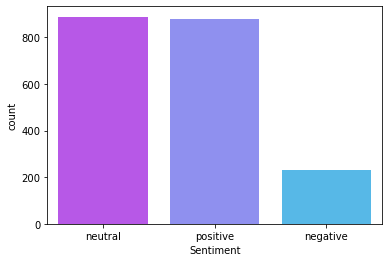

In [15]:
sns.countplot(df.Sentiment,palette='cool_r') #There are very less negative comments

<AxesSubplot:>

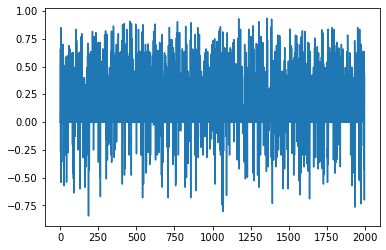

In [16]:
sns.lineplot(data = comp_values, palette='cool_r') #Most are positive/Neutral tweets

In [17]:
df.loc[df.Sentiment=='negative']

,Text,Scores,Sentiment
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
6,"Frodo was the underdoge,\nAll thought he would...","{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'comp...",negative
15,"He definitely has issues, but the sentencing ...","{'neg': 0.162, 'neu': 0.681, 'pos': 0.157, 'co...",negative
20,Any crypto wallet that won’t give you your pr...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",negative
21,Your app sucks,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",negative
...,...,...,...
1965,That is the near-term danger of AI,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",negative
1975,Death is the loss of information,"{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...",negative
1991,"No easy way to answer this in a tweet, but he...","{'neg': 0.205, 'neu': 0.622, 'pos': 0.174, 'co...",negative
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative


## Word Cloud

In [18]:
tweet_str = ' '.join(df['Text'].tolist()) #Since tweets are filled with little words, we cant remove stopwords

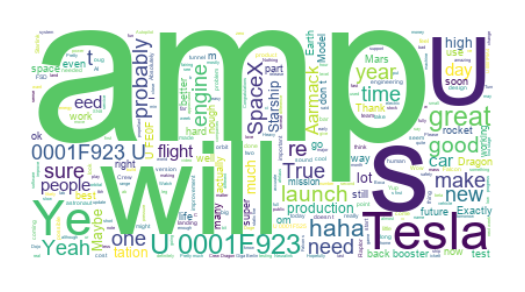

In [19]:
#Creating a WordCloud
from matplotlib.pyplot import figure
font_path = "C:\Windows\Fonts\Arial.ttf"
wordcloud_ip = WordCloud(
                      background_color="white", max_words=500,font_path=font_path,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(tweet_str)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

## Elon-Mask 

In [20]:
from PIL import Image
maskArray = np.array(Image.open("elon.png"))

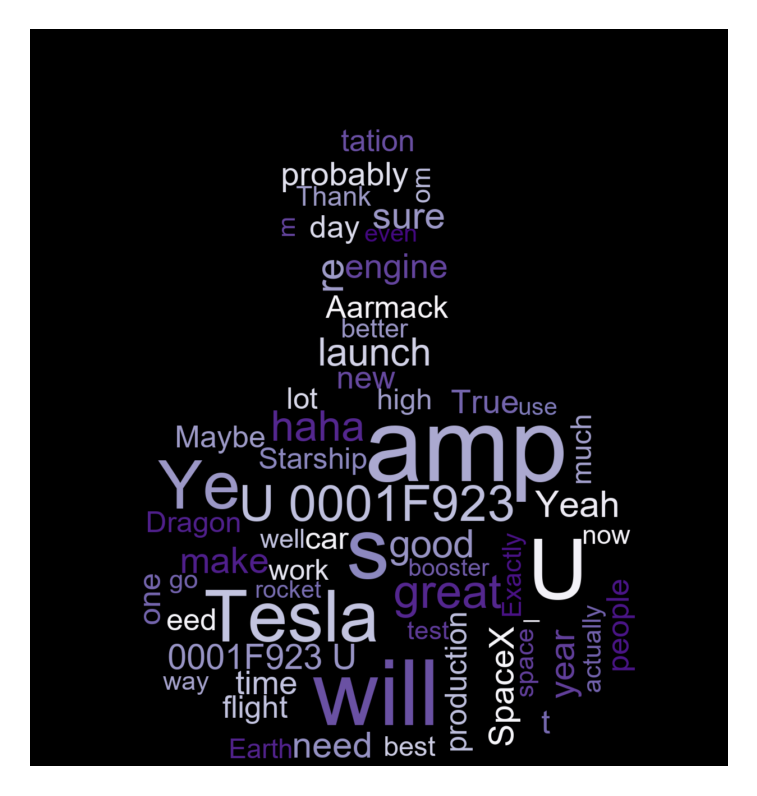

In [21]:
elon_mask = WordCloud(background_color='black',
                      max_words = 60, 
                    stopwords = set(STOPWORDS),
                    colormap='Purples_r',
                    mask = maskArray,
                    font_path=font_path).generate(tweet_str)

figure(figsize=(3,4), dpi=300)
plt.imshow(elon_mask,interpolation="bilinear")
plt.axis("off")
plt.show()

## Conclusion
- Perfomed Sentiment Analysis for elon musk tweets.
- Identified his key words and generated a cloud plot
- Generated a masking plot for elon musk